# Preprocessing: PART IV

**INPUT: _filt_events.fif files**

1. Requires MANUAL check for BAD segments
-> **OUTPUT: _filt_clean.fif file**
2. Runs ICA
    -> **OUTPUT: _ica.fif file AND components figures**
3. Applies ICA
    -> **OUTPUT: _reconst.fif file** - FINAL FILE

**PREPROCESSING FINISHED!**

In [1]:
import mne
import os
from utils import check_paths
import numpy as np
import pandas as pd
import pickle
from mne.preprocessing import ICA

import matplotlib.pyplot as plt
%matplotlib qt

C:\Users\a1902989\AppData\Local\Temp\ipykernel_17916\3467465247.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
137 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
137 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
137 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
137 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
137 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
137 matching events found
No baseline correction applied
0 projection items ac

In [8]:
# set EEG data path, group, task and subject
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
sub_name = 's1_pac_sub00' # specify the subject you want to analyse 's1_pac_sub52'

preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
filt_dir = os.path.join(preproc_dir, 'filt')
ica_dir = os.path.join(preproc_dir, 'ICA')


Manual check for BAD segments - run for SINGLE subs

In [9]:
# MANUAL CHECK: mark noisy segments (one sub at a time) - hit A, pick BADS and mark the segments.
#! Close the menu first, then close the plot

# MAIN

tasks = ['_MAIN'] #! Remove when BL is preprocessed ['_BL', '_MAIN']

for task in tasks:
    eeg_data_path = os.path.join(filt_dir, f'{sub_name}{task}_filt_events.fif')

    raw_filt_eve = mne.io.read_raw_fif(eeg_data_path, preload=True)

    # Open events from pickle file
    with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
        events = pickle.load(pickle_file)

    # MANUAL CHECK: mark noisy segments
    raw_filt_eve.plot(block=True, events=events[0], n_channels=64)
    plt.show()  # Blocks execution until the plot window is closed

    # save filtered file
    raw_filt_eve.save(os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif'), overwrite=True)
    print(f'{sub_name}{task} is CLEAN')


Opening raw data file D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\filt\s1_sub04_KS_MAIN_filt_events.fif...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_7544\1229849131.py:10: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\filt\s1_sub04_KS_MAIN_filt_events.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filt_eve = mne.io.read_raw_fif(eeg_data_path, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 0 ... 1798382 =      0.000 ...  3596.764 secs
Ready.
Reading 0 ... 1798382  =      0.000 ...  3596.764 secs...
Channels marked as bad:
none
Writing D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\filt\s1_sub04_KS_MAIN_filt_clean.fif


C:\Users\a1902989\AppData\Local\Temp\ipykernel_7544\1229849131.py:21: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\filt\s1_sub04_KS_MAIN_filt_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filt_eve.save(os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif'), overwrite=True)


Closing D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\filt\s1_sub04_KS_MAIN_filt_clean.fif
[done]
s1_sub04_KS_MAIN is CLEAN


In [ ]:
# MANUAL CHECK: mark noisy segments (one sub at a time) - hit A, pick BADS and mark the segments.
#! Close the menu first, then close the plot

# BL

eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
subs_dir = os.path.join(eeg_data_dir, group)

tasks = ['_BL'] #! Remove when BL is preprocessed ['_BL', '_MAIN']

for sub_name in os.listdir(subs_dir): # os.listdir(subs_dir) OR ['s1_pac_sub00']
    
    print(f'Processing {sub_name}...')

    preproc_dir = os.path.join(subs_dir, sub_name, 'preproc')
    filt_dir = os.path.join(subs_dir, sub_name, 'preproc', 'filt')

    for task in tasks:
        eeg_data_path = os.path.join(filt_dir, f'{sub_name}{task}_filt_events.fif')

        raw_filt_eve = mne.io.read_raw_fif(eeg_data_path, preload=True)

        # Open events from pickle file
        with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
            events = pickle.load(pickle_file)

        # MANUAL CHECK: mark noisy segments
        raw_filt_eve.plot(block=True, events=events[0], n_channels=64)
        plt.show()  # Blocks execution until the plot window is closed

        # save filtered file
        raw_filt_eve.save(os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif'), overwrite=True)
        print(f'{sub_name}{task} is CLEAN')
        

CHECK ANNOTATIONS

In [ ]:
# sub_name = 's1_pac_sub10'
# preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
# filt_dir = os.path.join(preproc_dir, 'filt')

# # Open events from pickle file
# with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
#     events = pickle.load(pickle_file)

eeg_data_path_check = os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif')

raw_filt_check = mne.io.read_raw_fif(eeg_data_path_check, preload=True)
raw_filt_check.plot(events=events[0], n_channels=64)

ICA - run GROUP analysis

Run only after manual cleaning of all the recordings!

In [ ]:
# ICA
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
subs_dir = os.path.join(eeg_data_dir, group)

tasks = ['_BL'] # ['_BL', '_MAIN']

for sub_name in os.listdir(subs_dir): # os.listdir(subs_dir) OR ['s1_pac_sub00']
    
    print(f'Processing {sub_name}...')

    preproc_dir = os.path.join(subs_dir, sub_name, 'preproc')
    filt_dir = os.path.join(subs_dir, sub_name, 'preproc', 'filt')

    # create a directory for ICA files
    ica_dir = os.path.join(preproc_dir, 'ICA')
    check_paths(ica_dir)

    for task in tasks:

        eeg_data_path = os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif')

        # apply ICA
        ica = ICA(n_components=None, max_iter="auto")
        ica.fit(raw_filt_eve)

        # plot and save the ICA components
        fig_components = ica.plot_components()

        for i, fig in enumerate(fig_components):
            fig.savefig(os.path.join(ica_dir, f'{sub_name}{task}_ica_components_{i}.png'))
            plt.close(fig)  # Close the figure after saving to avoid display

        ica.save(os.path.join(ica_dir, f'{sub_name}{task}_ica.fif'))


ICA - Manual check for BAD components - run for SINGLE subs

In [87]:
# MANUAL CHECK: pick ICA components to exclude
# When ICA sources are plotted, look at the ICA topography in parallel to decide which ICA component s to exclude
# TO EXCLUDE A COMPONENT: right-click on it (should turn grey) -> close the figure -> check after saving

eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
subs_dir = os.path.join(eeg_data_dir, group)

task = '_MAIN' # ['_BL', '_MAIN']
sub_name = 's1_pac_sub52' # specify the subject you want to analyse

preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
filt_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc', 'filt')
ica_dir = os.path.join(preproc_dir, 'ICA')
analysis_dir = os.path.join(preproc_dir, 'analysis')
check_paths(analysis_dir)

eeg_data_path = os.path.join(filt_dir, f'{sub_name}{task}_filt_clean.fif')
ica_path = os.path.join(ica_dir, f'{sub_name}{task}_ica.fif')

reconst_raw = mne.io.read_raw_fif(eeg_data_path, preload=True)
ica = mne.preprocessing.read_ica(ica_path)

# plot ICA sources
ica.plot_components(nrows=6, ncols=10)
ica.plot_sources(reconst_raw)
plt.show()


Opening raw data file D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\filt\s1_sub04_KS_MAIN_filt_clean.fif...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_17916\2228093846.py:21: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\filt\s1_sub04_KS_MAIN_filt_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw = mne.io.read_raw_fif(eeg_data_path, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 0 ... 1798382 =      0.000 ...  3596.764 secs
Ready.
Reading 0 ... 1798382  =      0.000 ...  3596.764 secs...
Reading D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\ICA\s1_sub04_KS_MAIN_ica.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
Now restoring ICA solution ...
Ready.
Creating RawArray with float64 data, n_channels=57, n_times=1798383
    Range : 0 ... 1798382 =      0.000 ...  3596.764 secs
Ready.


Creating RawArray with float64 data, n_channels=59, n_times=174422
    Range : 0 ... 174421 =      0.000 ...   348.842 secs
Ready.


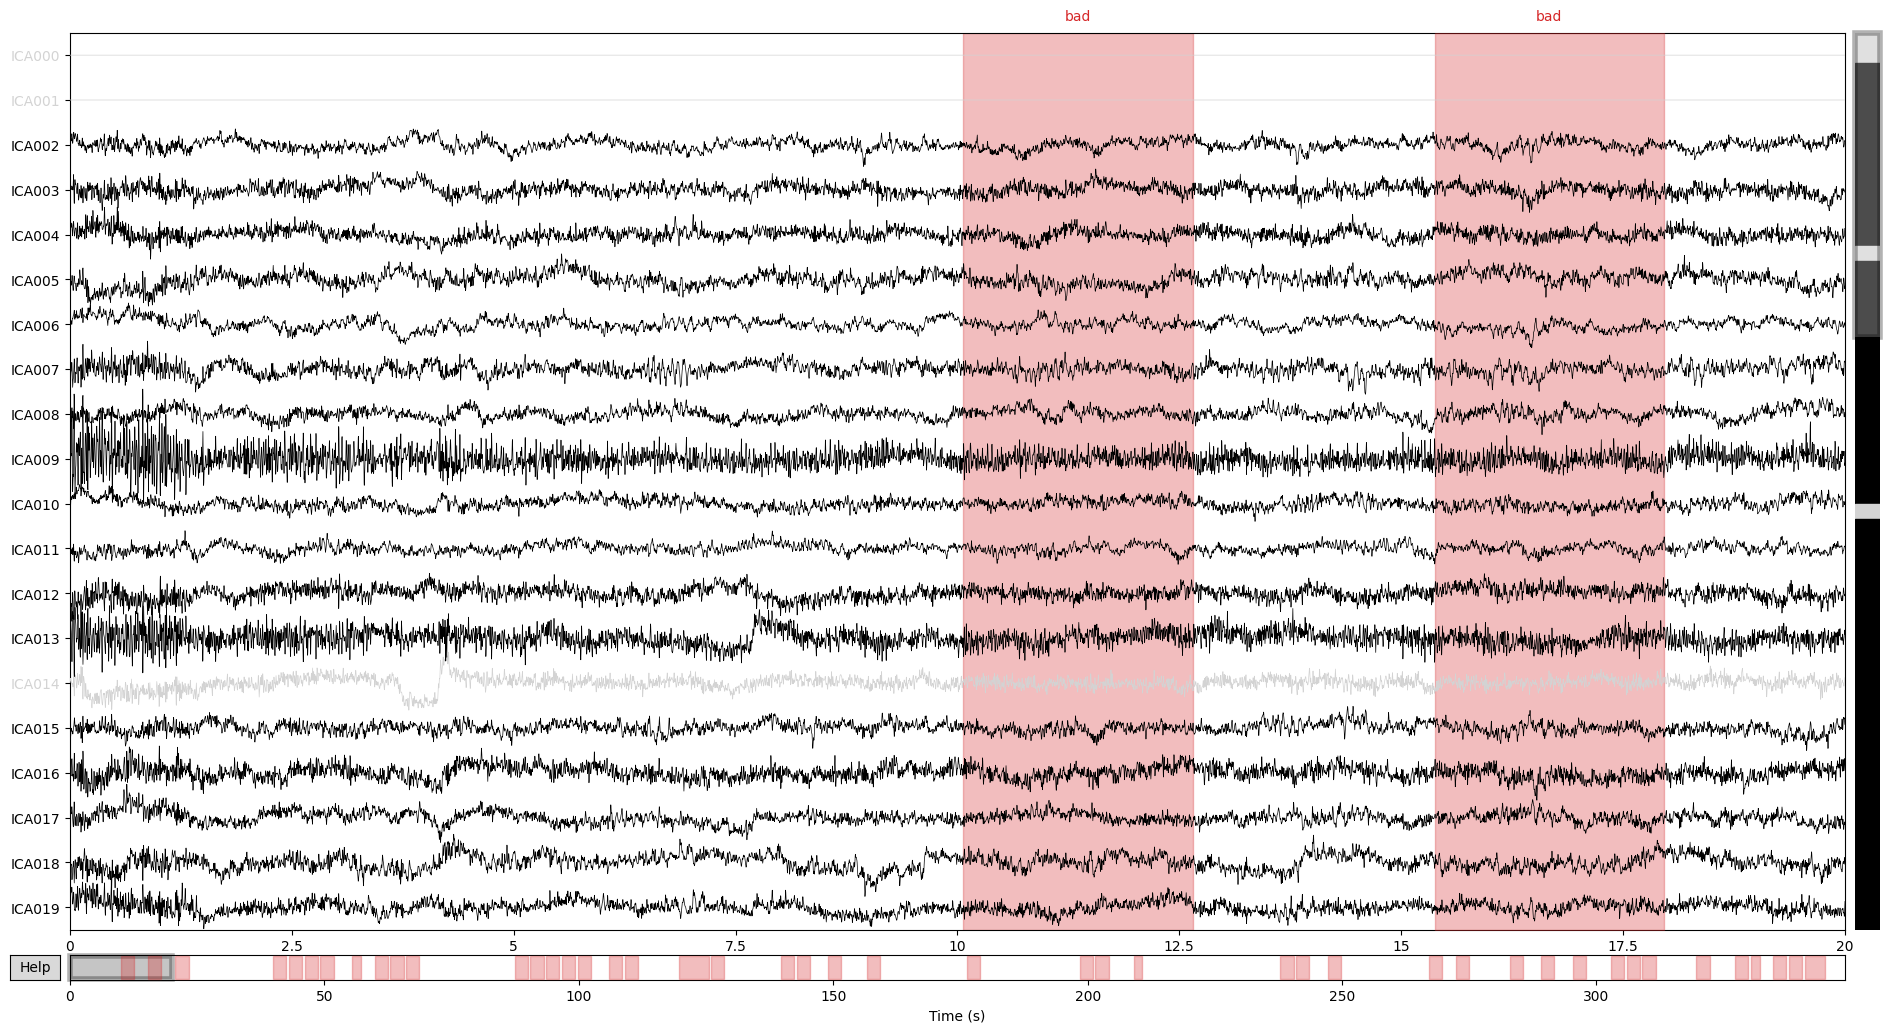

In [63]:
ica.plot_sources(reconst_raw)

In [88]:
ica.apply(reconst_raw)

Applying ICA to Raw instance
    Transforming to ICA space (57 components)
    Zeroing out 8 ICA components
    Projecting back using 60 PCA components


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,63 points
Good channels,"60 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.50 Hz
Lowpass,80.00 Hz


In [90]:
# save ICA with excluded components and reconstructed file
ica.save(os.path.join(ica_dir, f'{sub_name}{task}_ica_excl.fif'), overwrite=True)
reconst_raw.save(os.path.join(analysis_dir, f'{sub_name}{task}_reconst.fif'), overwrite=True) # FINAL FILE

Writing ICA solution to D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\ICA\s1_sub04_KS_MAIN_ica_excl.fif...
Writing D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\analysis\s1_sub04_KS_MAIN_reconst.fif


C:\Users\a1902989\AppData\Local\Temp\ipykernel_17916\3419396390.py:2: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\ICA\s1_sub04_KS_MAIN_ica_excl.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(os.path.join(ica_dir, f'{sub_name}{task}_ica_excl.fif'), overwrite=True)
C:\Users\a1902989\AppData\Local\Temp\ipykernel_17916\3419396390.py:3: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\analysis\s1_sub04_KS_MAIN_reconst.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw.save(os.path.join(analysis_dir, f'{sub_name}{task}_reconst.fif'), overwrite=True) # FINAL FILE


Closing D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\analysis\s1_sub04_KS_MAIN_reconst.fif
[done]


SANITY CHECK

Opening raw data file D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\filt\s1_sub04_KS_MAIN_filt_clean.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 0 ... 1798382 =      0.000 ...  3596.764 secs
Ready.
Reading 0 ... 1798382  =      0.000 ...  3596.764 secs...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_17916\1930650645.py:6: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_sub04_KS\preproc\filt\s1_sub04_KS_MAIN_filt_clean.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(eeg_data_path, preload=True)


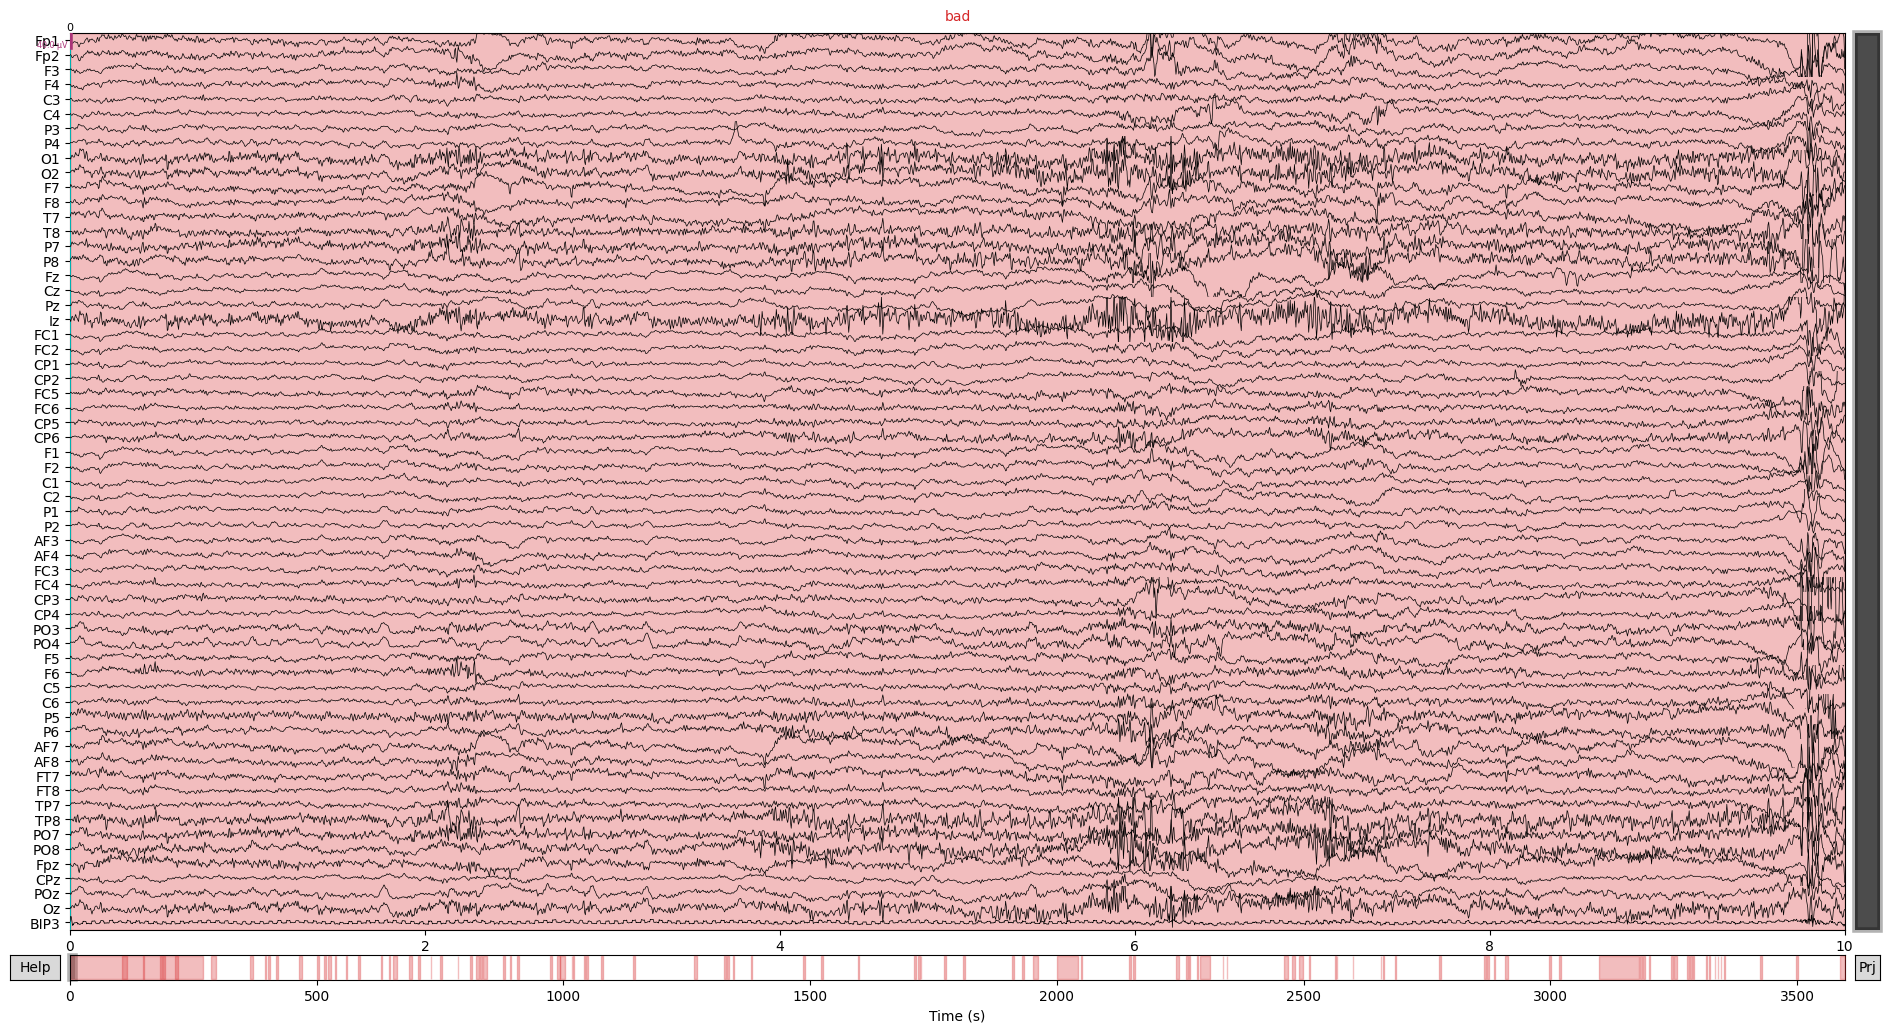

In [89]:
# Open events from pickle file
with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
    events = pickle.load(pickle_file)

# before ICA
raw = mne.io.read_raw_fif(eeg_data_path, preload=True)
raw.plot(events=events[0], n_channels=64)

# after ICA
reconst_raw.plot(events=events[0], n_channels=64)